In [2]:
import glob
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL.ImageOps as ImOps

Preproccesing

In [3]:
def persiapan_dataset(path):
    x_latih=[]
    y_latih=[]
    kode = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            kode = 0
        elif labels == 'ca':
            kode = 1
        elif labels == 'ta':
            kode = 2
        elif labels == 'pa':
            kode = 3
        elif labels == 'ya':
            kode = 4
        elif labels == 'wa':
            kode = 5
        elif labels == 'ga':
            kode = 6
        elif labels == 'ja':
            kode = 7
        elif labels == 'da':
            kode = 8
        elif labels == 'ba':
            kode = 9
        elif labels == 'ra':
            kode = 10
        elif labels == 'sa':
            kode = 11
        elif labels == 'nga':
            kode = 12
        elif labels == 'nya':
            kode = 13
        elif labels == 'na':
            kode = 14
        elif labels == 'ma':
            kode = 15
        elif labels == 'la':
            kode = 16
        elif labels== 'ha':
            kode = 17
            
        semua_images_path = glob.glob(path+labels+'/*.jpg')
        for img_path in semua_images_path :
                img=load_img(img_path, target_size=(64,64))
                img=img_to_array(img)
                img=img/255.0
                x_latih.append(img)
                y_latih.append(kode)
    return np.array(x_latih),np.array(y_latih)

In [4]:
x_latih, y_latih = persiapan_dataset('train-set/')
x_val, y_val = persiapan_dataset('test-set/')

In [5]:
print("Shape x_train :",x_latih.shape)
print("Shape y_train:", y_latih.shape)
print(" bShape x_train :",x_val.shape)
print("Shape y_train:", y_val.shape)

Shape x_train : (575, 64, 64, 3)
Shape y_train: (575,)
 bShape x_train : (144, 64, 64, 3)
Shape y_train: (144,)


In [6]:
from keras.preprocessing.image import ImageDataGenerator
import dataaug

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)

datagen.fit(x_latih, augment=True)
data_test = datagen.flow(x_latih, y_latih, batch_size=5)

In [7]:
x_latih, y_latih = persiapan_dataset('train-set/')

Train Augmetasi Data


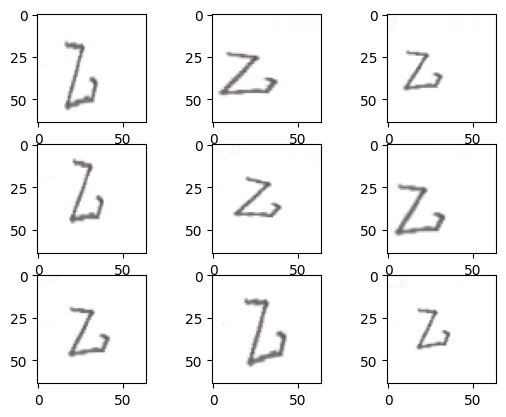

In [8]:
from numpy import expand_dims
import matplotlib.pyplot as plt

img = x_latih[100]
samples = expand_dims(img, 0)
it = datagen.flow(samples, batch_size=1)
print("Train Augmetasi Data")
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

In [9]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from keras.optimizers import Adam

def modelLeNet():
    model = Sequential([
        tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(64,64,3)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(48, (5, 5), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(120, (5, 5), activation='relu'),
        
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(18, activation = 'softmax')
    ])
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    
    return model

modelLeNet().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 120)         144120    
                                                                 
 flatten (Flatten)           (None, 9720)              0

c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
LeNet_Aug = modelLeNet()
LeNet_non_Aug = modelLeNet()

In [18]:
history_nonAug = LeNet_non_Aug.fit(x_latih,y_latih,epochs=15,validation_data=(x_val,y_val))

Epoch 1/15
18/18 [==============================] - 4s 177ms/step - loss: 2.9144 - acc: 0.0383 - val_loss: 2.8897 - val_acc: 0.0556
Epoch 2/15
18/18 [==============================] - 3s 171ms/step - loss: 2.8913 - acc: 0.0539 - val_loss: 2.8871 - val_acc: 0.0556
Epoch 3/15
18/18 [==============================] - 3s 179ms/step - loss: 2.8866 - acc: 0.0661 - val_loss: 2.8819 - val_acc: 0.0694
Epoch 4/15
18/18 [==============================] - 3s 185ms/step - loss: 2.8780 - acc: 0.1026 - val_loss: 2.8724 - val_acc: 0.1875
Epoch 5/15
18/18 [==============================] - 3s 183ms/step - loss: 2.8658 - acc: 0.1339 - val_loss: 2.8519 - val_acc: 0.1250
Epoch 6/15
18/18 [==============================] - 3s 195ms/step - loss: 2.8257 - acc: 0.1565 - val_loss: 2.8049 - val_acc: 0.1528
Epoch 7/15
18/18 [==============================] - 4s 213ms/step - loss: 2.7412 - acc: 0.1722 - val_loss: 2.6708 - val_acc: 0.2569
Epoch 8/15
18/18 [==============================] - 3s 182ms/step - loss: 2.

In [19]:
history_Lenet_Aug = LeNet_Aug.fit(data_test,validation_data=(x_val,y_val),
          steps_per_epoch=len(x_latih)/5, epochs=15)

Epoch 1/15
115/115 [==============================] - 7s 53ms/step - loss: 2.8970 - acc: 0.0557 - val_loss: 2.8898 - val_acc: 0.0486
Epoch 2/15
115/115 [==============================] - 6s 54ms/step - loss: 2.8915 - acc: 0.0365 - val_loss: 2.8882 - val_acc: 0.0486
Epoch 3/15
115/115 [==============================] - 6s 56ms/step - loss: 2.8911 - acc: 0.0626 - val_loss: 2.8822 - val_acc: 0.0486
Epoch 4/15
115/115 [==============================] - 6s 53ms/step - loss: 2.8873 - acc: 0.0609 - val_loss: 2.8814 - val_acc: 0.1736
Epoch 5/15
115/115 [==============================] - 6s 54ms/step - loss: 2.8538 - acc: 0.0904 - val_loss: 2.6836 - val_acc: 0.1528
Epoch 6/15
115/115 [==============================] - 6s 54ms/step - loss: 2.6959 - acc: 0.1530 - val_loss: 2.4312 - val_acc: 0.2569
Epoch 7/15
115/115 [==============================] - 6s 55ms/step - loss: 2.5515 - acc: 0.2122 - val_loss: 2.0869 - val_acc: 0.3819
Epoch 8/15
115/115 [==============================] - 6s 55ms/step - 

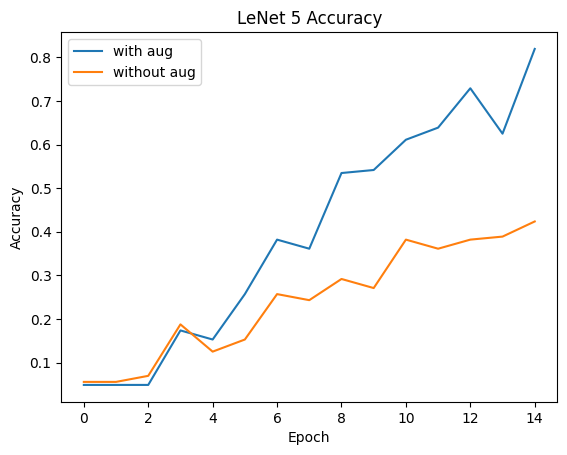

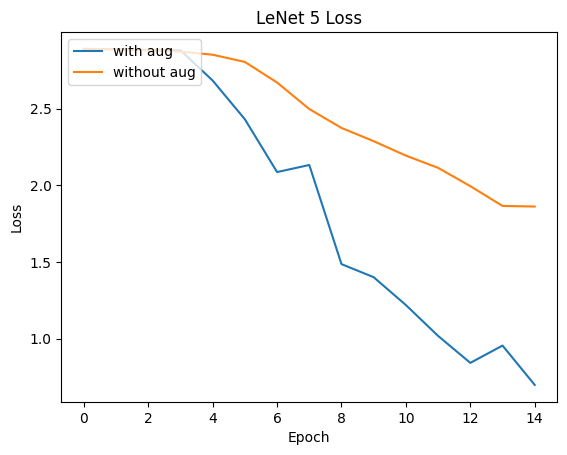

In [20]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Lenet_Aug.history['val_acc'])
plt.plot(history_nonAug.history['val_acc'])
plt.title('LeNet 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

plt.plot(history_Lenet_Aug.history['val_loss'])
plt.plot(history_nonAug.history['val_loss'])
plt.title('LeNet 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

In [84]:
def prediksi_dataset(path):
    x_predik=[]
    y_predik=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(64,64))
                img = ImOps.invert(img)
                img=img_to_array(img)
                img=img/255.0
                x_predik.append(img)
                y_predik.append(label)
    return np.array(x_predik),np.array(y_predik)

def get_classlabel(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
    classl = labels[class_code]
    
    return classl


In [85]:
x_predik, y_predik = prediksi_dataset('prediksi/')
print("Shape x_prediksi :",x_predik.shape)
print("Shape y_prediksi:", y_predik.shape)

Shape x_prediksi : (0,)
Shape y_prediksi: (0,)


In [86]:
def pred_dataset(path):
    x_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(64,64))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
    return np.array(x_train)

In [87]:
pred_img = pred_dataset('prediksi/')
pred_img.shape

(36, 64, 64, 3)

1/1 [==============================] - 0s 33ms/step


C:\Users\kiran\AppData\Local\Temp\ipykernel_6568\1010702959.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


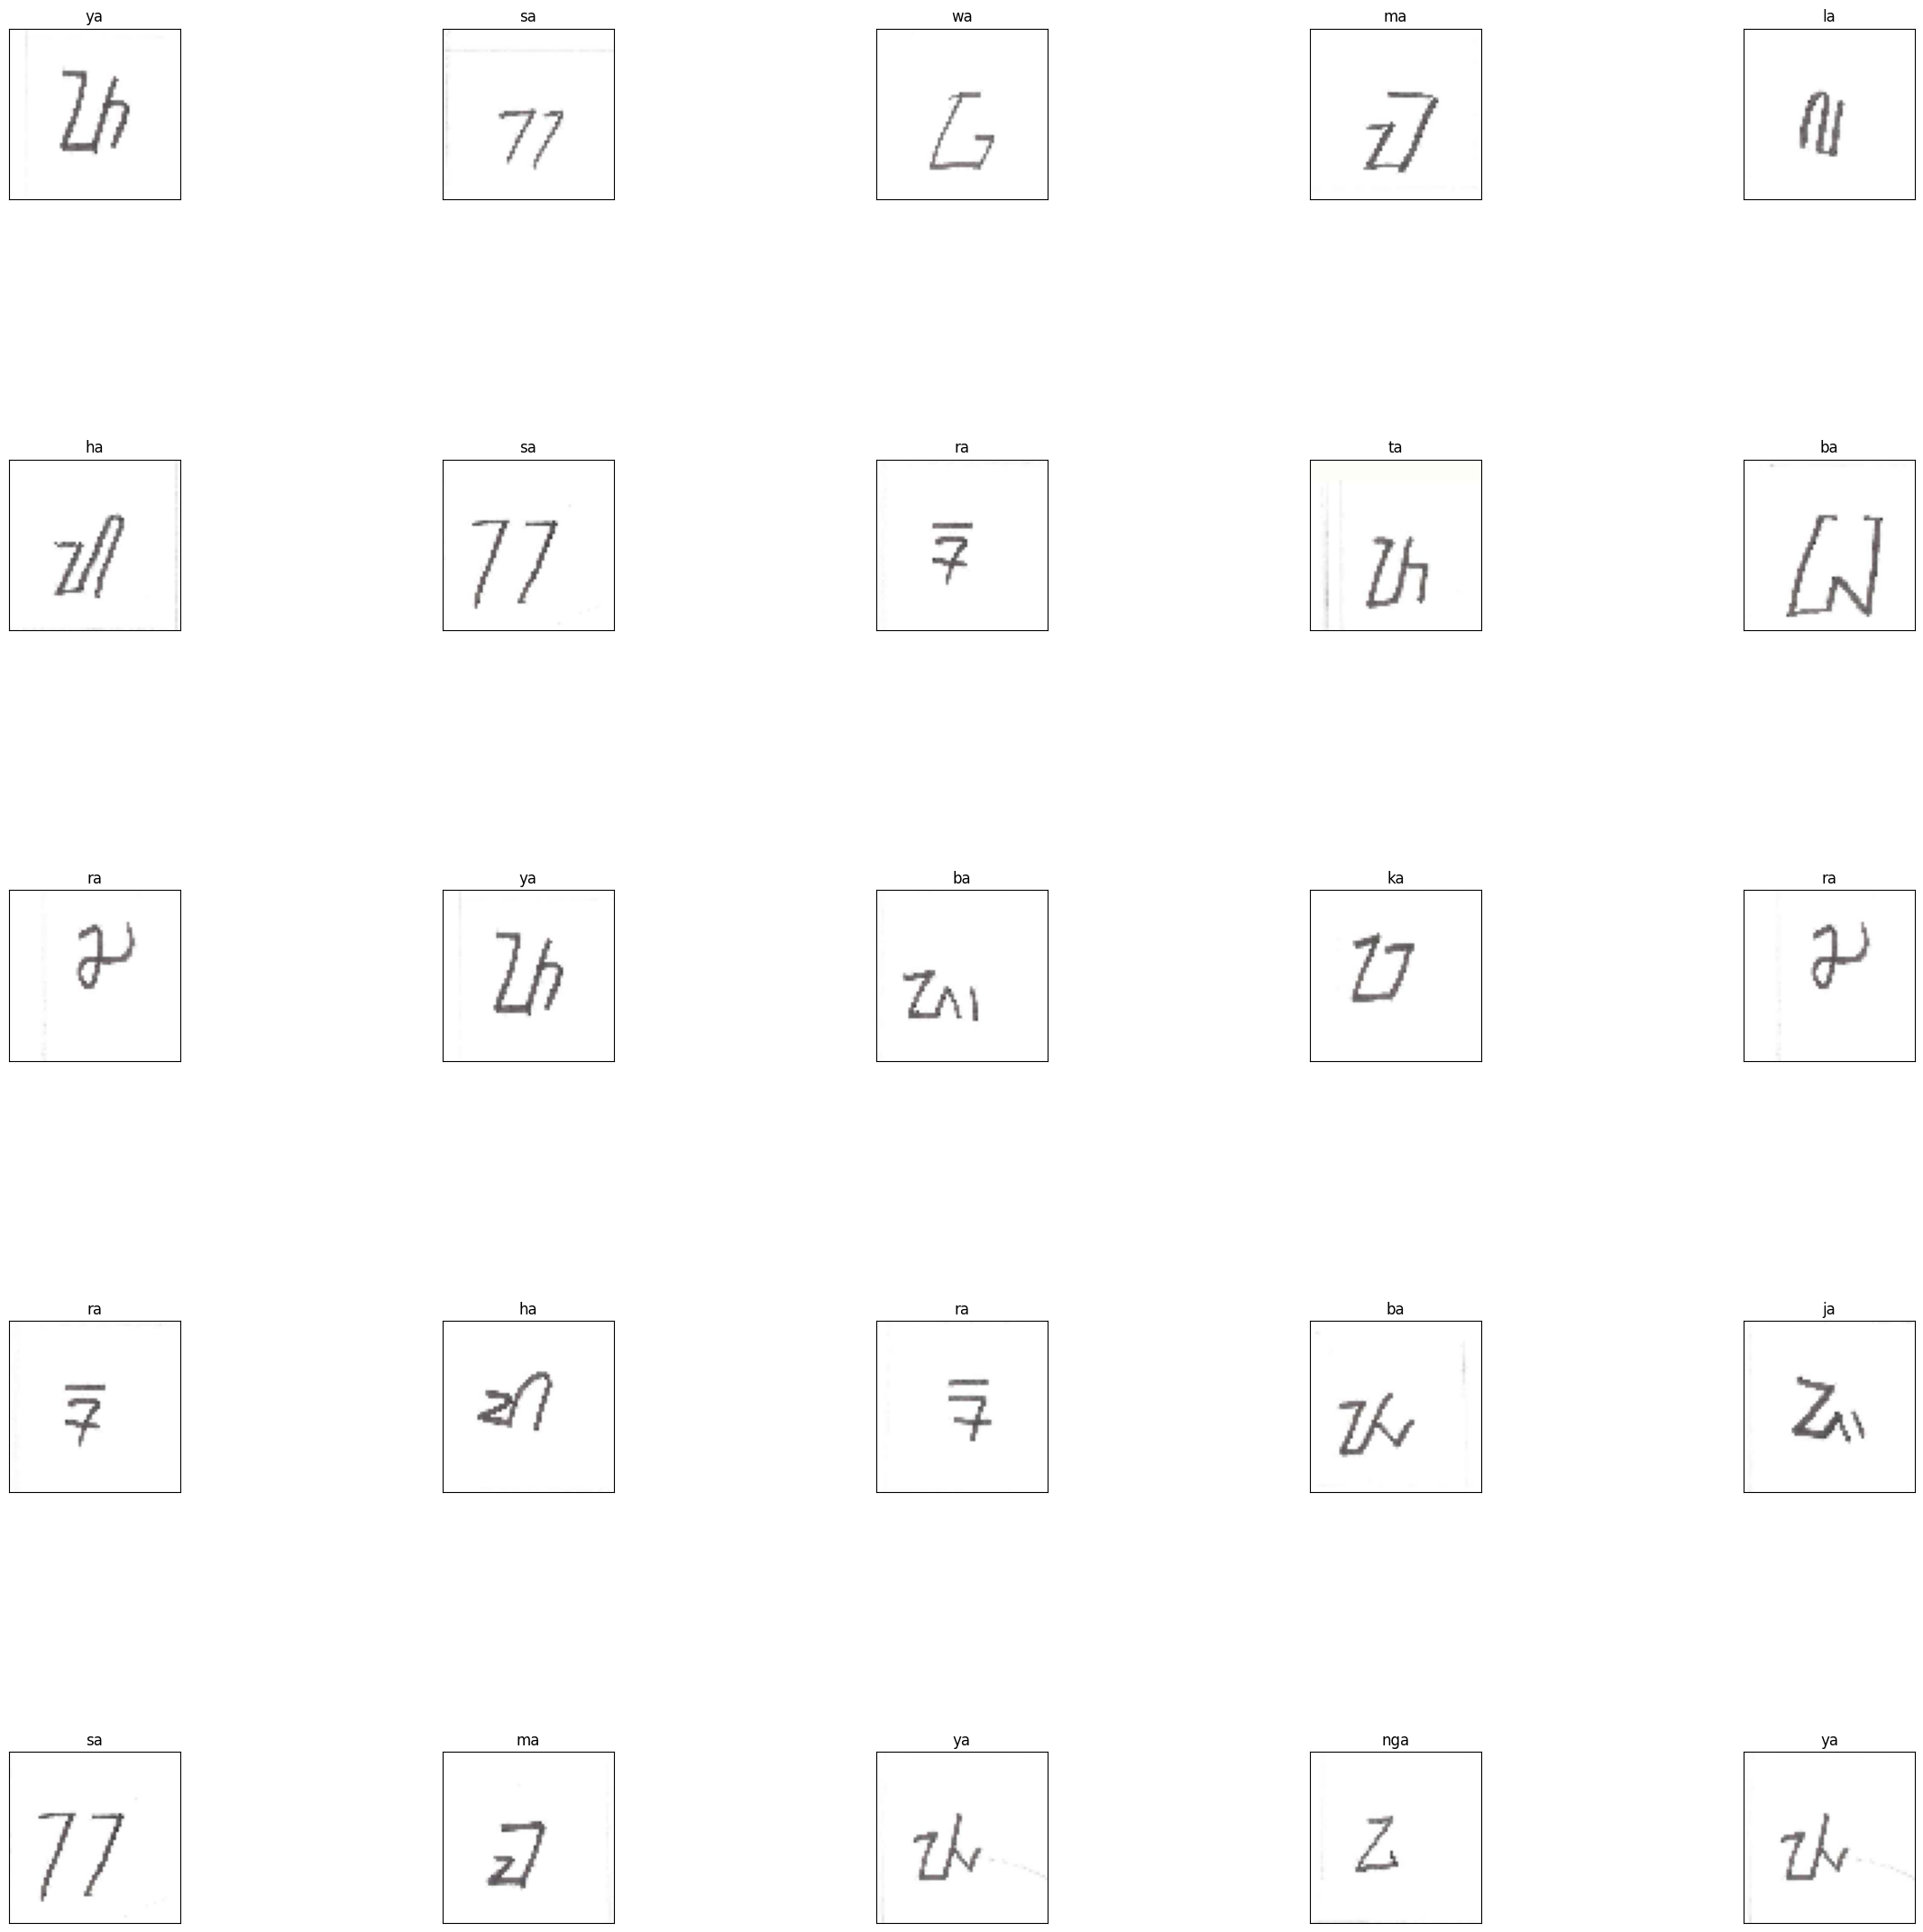

In [88]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from random import randint
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_img))
    pred_image = np.array([pred_img[rnd_number]])
    x = np.argmax(LeNet_Aug.predict(pred_image)[0])
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow((pred_image[0]*255).astype(np.uint8))
            ax.set_title(get_classlabel(x))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)


fig.show()

5/5 [==============================] - 0s 52ms/step


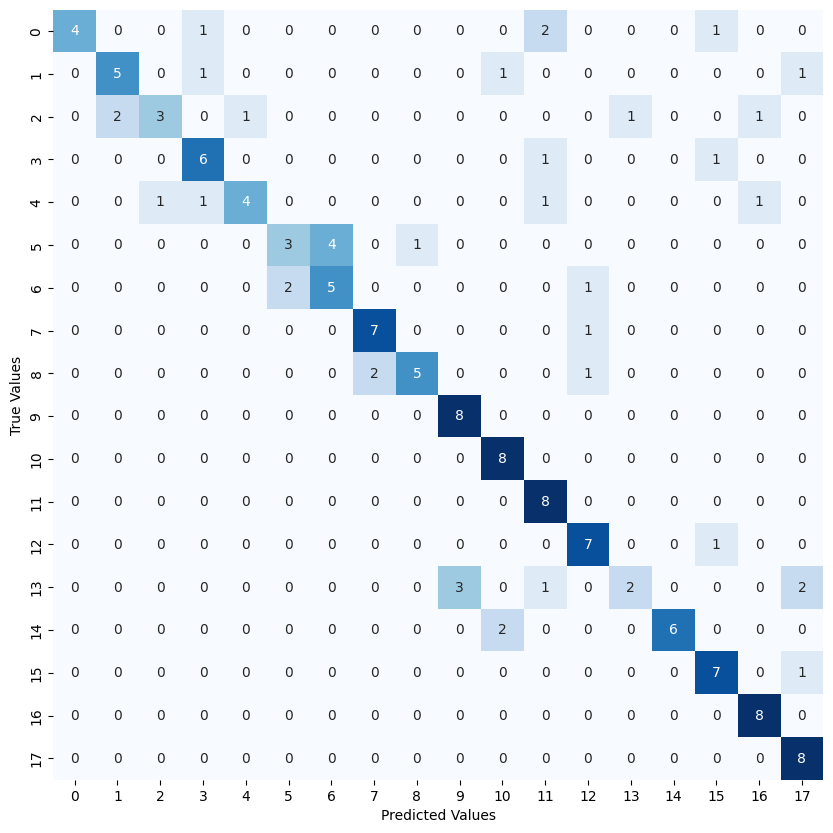

In [89]:
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = LeNet_Aug.predict(x_val)

Y_pred = np.argmax(y_pred, 1) 

mat = confusion_matrix(y_val, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [90]:
LeNet_Aug.save('model_cnn.h5')

In [91]:
model_cnn = tf.keras.models.load_model('model_cnn.h5')

In [92]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn)

model_tflite = converter.convert()

open("tf_lite_model_cnn.tflite", "wb").write(model_tflite)

INFO:tensorflow:Assets written to: C:\Users\kiran\AppData\Local\Temp\tmp6rpiwoyq\assets


INFO:tensorflow:Assets written to: C:\Users\kiran\AppData\Local\Temp\tmp6rpiwoyq\assets


10791248

In [22]:
export_dir = 'saved_model'

tf.saved_model.save(LeNet_Aug, export_dir)

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [23]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [24]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [26]:
import pathlib

tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

2705424

In [27]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

with open('model_metadata.txt', 'w') as f:
    f.write("Input Details:\n")
    f.write(str(input_details))
    f.write("\n\nOutput Details:\n")
    f.write(str(output_details))

# Dapatkan nilai bobot dan bias dari setiap layer
with open('model_weights.txt', 'w') as f:
    for i, details in enumerate(interpreter.get_tensor_details()):
        name = details['name']
        weights = interpreter.get_tensor(i)
        f.write(f"Layer {i+1}: {name}\n")
        f.write(f"Weights:\n{str(weights)}\n\n")